## Customer Churn Prediction (Bank Customers)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Load Dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
print(df.shape)
print(df.columns)
print(df.head())

(10000, 14)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
   RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]


### Data Inspection

In [3]:
print(df.isnull().sum())
print(df.info())
print(df.describe())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-n

### Data Cleaning & Preparation
- Dropping unnecessary columns
- Encoding categorical variables

In [4]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname']) # drop unnecessary columns

In [5]:
# Label Encoding for Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-Hot Encoding for Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
print(df.head())

   CreditScore  Gender  Age  ...  Exited  Geography_Germany  Geography_Spain
0          619       0   42  ...       1              False            False
1          608       0   41  ...       0              False             True
2          502       0   42  ...       1              False            False
3          699       0   39  ...       0              False            False
4          850       0   43  ...       0              False             True

[5 rows x 12 columns]


### Feature and Target Setup

In [6]:
X = df.drop('Exited', axis=1)
y = df['Exited']

### Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [9]:
# Predicting on the test set
y_pred = model.predict(X_test)

### Model Accuracy
- Accuracy Score
- Confusion Matrix

Accuracy: 0.8145
Confusion Matrix:
 [[1548   59]
 [ 312   81]]


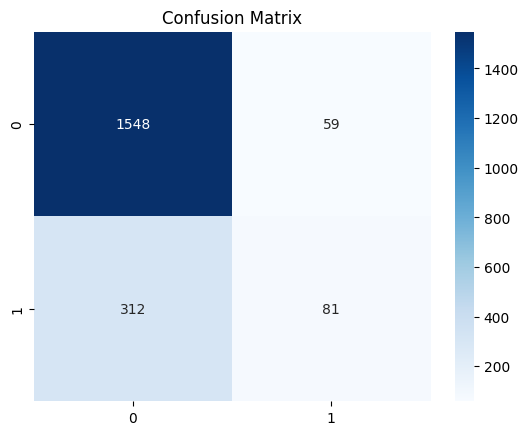

In [10]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Confusin Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# Visualize Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Feature Importance Using Logistic Regression

              Feature   Coefficient
9   Geography_Germany  9.847545e-01
10    Geography_Spain  2.678648e-01
2                 Age  6.255211e-02
4             Balance  9.605083e-07
8     EstimatedSalary -5.757071e-07
0         CreditScore -2.587583e-03
3              Tenure -2.894077e-02
6           HasCrCard -1.569987e-01
5       NumOfProducts -3.063208e-01
1              Gender -5.157174e-01
7      IsActiveMember -1.073768e+00


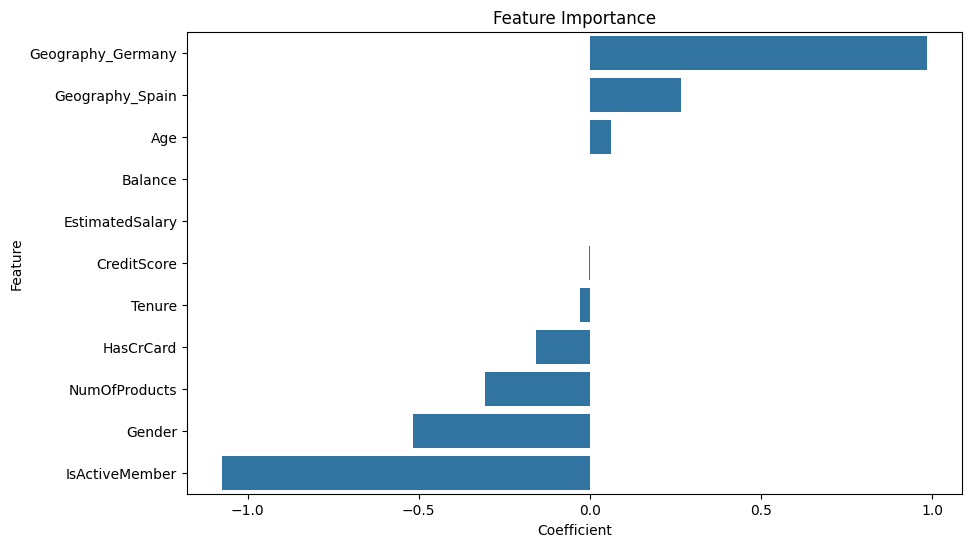

In [11]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)
# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance')
plt.show()

### Conclusion
#### KeyInsights
- Model accuracy is **0.8145**.  
- Features like credit score, age, and balance have significant importance in predicting churn.  
- Geography also plays a role (as seen in the one-hot encoded features).  
- Gender has a smaller but still measurable impact.
#### References
- Dataset: [Kaggle - Churn Modelling Dataset](https://www.kaggle.com/datasets/shubhendra21/churn-modelling-dataset)
- pandas: [pandas Documentation](https://pandas.pydata.org/docs/)
- seaborn: [seaborn Documentation](https://seaborn.pydata.org/)
- matplotlib: [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- scikit-learn: [scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)